## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

# Сначала идет домашка в виде рассуждений. Потом - код.

Baseline кода с урока: `80-85%`

### 1. Вопрос. Параметры для изменения:
1. число нейронов скрытого слоя - `на точность влияет слабо`
2. скорость обучения - `оптимальна 0,1. когда меньше - падает точность, когда больше - модель нестабильно себя ведет`
3. число эпох - `при 5000 точность 93-95%`
4. функция активации - `изменение функции активации на ReLu - результат сразу падает до 60-65%`
5. инициализация начальных весов - `оставил только random - результат не поменялся`

Реализовал добавление ещё одного слоя в нейронную сеть. точность повысилась (`доходит до 96%`), но модель стала работать нестабильно - иногда обучение идет как-то странно и выходит на точность 70-80%

Добавил ещё один слой. Точность не выросла, но стабильность модели очень сильно просела!

#### Максимальный результат, которого удалось добиться - `96-97% (baseline = 85%)`

### 2. Вопрос. В данном случае к улучшению точности нейросети приводит увеличение числа эпох. Остальные параметры (число нейронов, скорость обучения, количество слоев, даже функция активации) надо подбирать...

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [3]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
# def from_one_hot(Y):
#     arr = np.zeros((len(Y), 1))

#     for i in range(len(Y)):
#         l = Y[i]
#         for j in range(len(l)):
#             if(l[j] == 1):
#                 arr[i] = j+1
#     return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [4]:
# ReLu и её производная
def ReLU(x):
    return x  *  (x  >  0) 
# вычисление производной от Relu функции
def ReLU_deriv(x):
    return x > 0

# Leaky_ReLu и её производная
def L_ReLU(x): 
    return x  *  ((x  >  0) + 0.01)

# вычисление производной от Relu функции
def L_relu_deriv(x):
    return ((x>0) + 0.01)

In [5]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
# g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# w0 = np.random.random((4, neuron_numb))
# w0

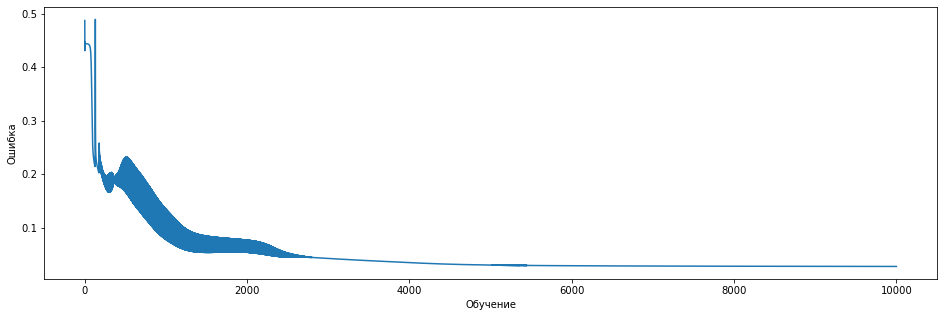

Аккуратность нейронной сети 97.26%
Аккуратность нейронной сети на тесте 98.42%


In [15]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 
# w2 = 2*np.random.random((neuron_numb, neuron_numb)) - 1
w2 = 2*np.random.random((neuron_numb, 3)) - 1

# w0 = np.random.random((4, neuron_numb))
# w1 = np.random.random((neuron_numb, neuron_numb))
# w2 = np.random.random((neuron_numb, 3))

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# число этох
ephos = 10000

# процесс обучения
for i in range(ephos):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    
#     layer1 = ReLU(np.dot(layer0, w0))
#     layer2 = ReLU(np.dot(layer1, w1))
    
    layer3 = sigmoid(np.dot(layer2, w2))
##     layer4 = sigmoid(np.dot(layer3, w3))  
    

    # обратное распространение(back propagation) с использованием градиентного спуска
    
    layer3_error = y_train - layer3 # производная функции потерь = производная квадратичных потерь 
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
#     layer3_delta = layer3_error * ReLU_deriv(layer3)
    

#     layer3_error = layer4_delta.dot(w3.T)
#     layer3_delta = layer3_error * sigmoid_deriv(layer3) 
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)  
#     layer2_delta = layer2_error * ReLU_deriv(layer2)  
    
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
#     layer1_delta = layer1_error * ReLU_deriv(layer1)

#     w3 += layer3.T.dot(layer4_delta) * n
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    # метрика модели
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

# N = 50
# plt.figure(figsize = (16,5))
# plt.plot(layer2[:N,1], 'r',label = 'Y new')
# plt.plot(y_train[:N,1],'g', label = 'Y train')
# plt.xlabel('№ примера')
# plt.ylabel('выход сети и целевой')
# plt.legend( )
# plt.show() # расскоментируйте, чтобы посмотреть     
    
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")


# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer3_t = sigmoid(np.dot(layer2_t, w2))
# layer1_t = ReLU(np.dot(layer0_t, w0))
# layer2_t = ReLU(np.dot(layer1_t, w1))
# layer3_t = sigmoid(np.dot(layer2_t, w2))
layer3_error_t = y_test - layer3_t
    
    
# N = 50
# plt.figure(figsize = (16,5))
# plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
# plt.plot(y_test[:N,1],'g', label = 'Y train')
# plt.xlabel('№ примера')
# plt.ylabel('выход сети и целевой')
# plt.legend( )
# plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer3_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

In [ ]:
# w0

In [64]:
# layer2